In [39]:
from keras.applications.vgg16 import VGG16

# Load the VGG Model

In [53]:
vgg_model = VGG16()
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [54]:
from keras.utils.vis_utils import plot_model

# create a plot of the layers in the VGG model
plot_model(vgg_model, to_file='./images/vgg16_model.png')

<img src="./images/vgg16_model.png" width="250px" />

# Load and Prepare Image

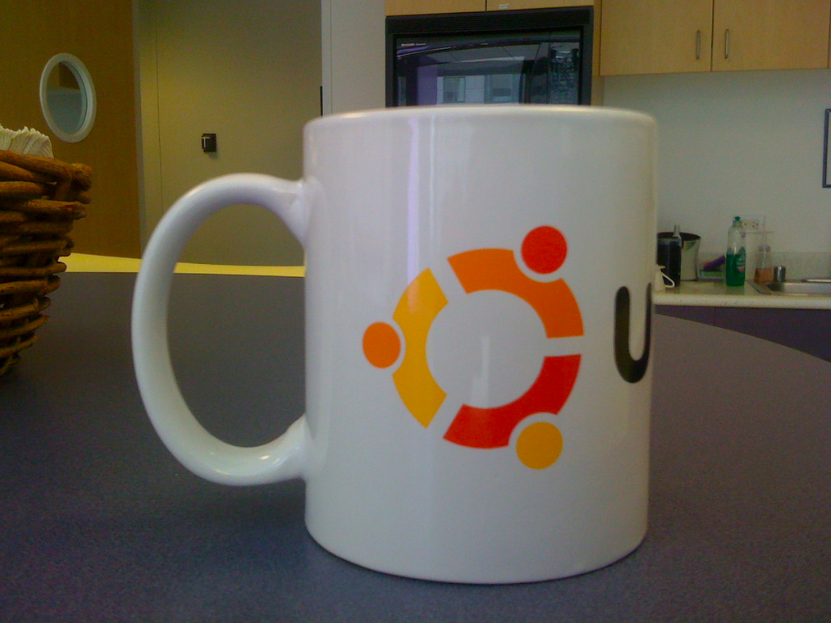

In [55]:
from keras.preprocessing.image import load_img
image = load_img('./images/mug.png')
image

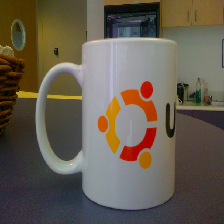

In [56]:
# load the image and resize it to the required size 
image = load_img('./images/mug.png', target_size=(224, 224))
image

In [57]:
from keras.preprocessing.image import img_to_array

# convert the image pixels to a numpy array so we can work with it in Keras
image = img_to_array(image)
image[0:5,5]

array([[75., 52.,  0.],
       [74., 57.,  0.],
       [69., 57.,  0.],
       [67., 54.,  0.],
       [74., 55.,  1.]], dtype=float32)

The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels. We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.

In [58]:
image.shape

(224, 224, 3)

In [59]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

"The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."

â€” Very Deep Convolutional Networks for Large-Scale Image Recognition, 2014.

In [60]:
from keras.applications.vgg16 import preprocess_input

# prepare the image for the VGG model
image = preprocess_input(image)

# Make a Prediction

In [61]:
# predict the probability across all output classes
yhat = vgg_model.predict(image)

# Interpret Prediction

In [76]:
from keras.applications.vgg16 import decode_predictions

# convert the probabilities to class labels
label = decode_predictions(yhat)
label

[[('n03063599', 'coffee_mug', 0.7594448),
  ('n03063689', 'coffeepot', 0.08217372),
  ('n07930864', 'cup', 0.08036745),
  ('n04398044', 'teapot', 0.027677393),
  ('n03950228', 'pitcher', 0.02042045)]]

In [77]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
label

('n03063599', 'coffee_mug', 0.7594448)

In [78]:
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (75.94%)


Credit to: https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

<hr/>